<a href="https://colab.research.google.com/github/crea0414/1st_CVDL/blob/master/Day004_geometric_transform_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 範例

實作本篇提到的三大概念

- 翻轉：實作上下翻轉
- 縮放：實作鄰近差值
- 平移：建立 Translation Transformation Matrix 來做平移

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2, os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_path = '/content/drive/My Drive/First_CV_DL191125/lena.png'
img = cv2.imread(img_path)

## 上下翻轉圖片

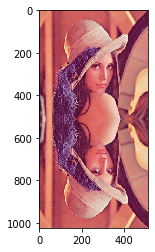

In [3]:
# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]

# 組合 + 顯示圖片
hflip = np.vstack((img, img_vflip))
hflip_RGB = cv2.cvtColor(hflip, cv2.COLOR_BGR2RGB)

plt.imshow(hflip_RGB);

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.007 secs


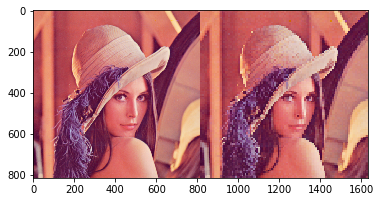

In [4]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {:.3f} secs'.format(time.time() - start_time))

# 組合 + 顯示圖片
orig_img = cv2.resize(img, img_area_scale.shape[:2])
img_zoom = np.hstack((orig_img, img_area_scale))

img_zoom_RGB = cv2.cvtColor(img_zoom, cv2.COLOR_BGR2RGB)
plt.imshow(img_zoom_RGB);

## 平移幾何轉換

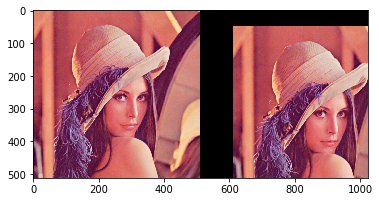

In [5]:
# 設定 translation transformation matrix
# x 平移 100 pixel; y 平移 50 pixel
M = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))

img_shift_RGB = cv2.cvtColor(img_shift, cv2.COLOR_BGR2RGB)
plt.imshow(img_shift_RGB);

# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

## 上下左右翻轉圖片

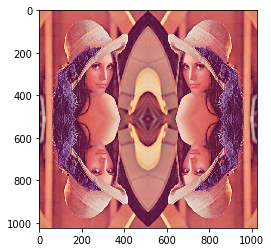

In [6]:
# 水平翻轉 (horizontal)
img_hflip = img[:, ::-1, :]

# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]

# 水平 + 垂直翻轉
img_hvflip = img[::-1, ::-1, :]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))


img_flip_RGB = cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB)
plt.imshow(img_flip_RGB);

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.00209
INTER_CUBIC zoom cost 0.00524


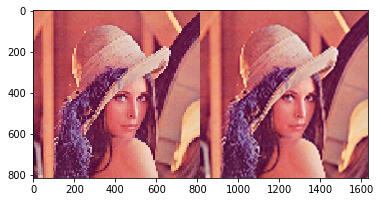

In [7]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {:.5f}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {:.5f}'.format(time.time() - start_time))

# 組合 + 顯示圖片
img_zoom = np.hstack((img_area_scale, img_cubic_scale))

img_zoom_RGB = cv2.cvtColor(img_zoom, cv2.COLOR_BGR2RGB)
plt.imshow(img_zoom_RGB);

## 平移幾何轉換

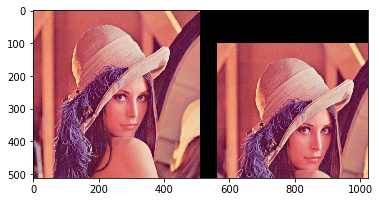

In [8]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 50],
              [0, 1, 100]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
shift_img = np.hstack([img, shift_img])
shift_img_RGB = cv2.cvtColor(shift_img, cv2.COLOR_BGR2RGB)
plt.imshow(shift_img_RGB);